### 4. 은행나무(Ginkgo)
#### (1) 모델링 데이터 전처리 및 특성 변환

#### 분석 모듈 및 패키지 불러오기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import io
from skimage import io

#### 모델링 데이터 불러오기

In [3]:
# 미분포 가설 지역 데이터
g_negative = pd.read_csv("negative_Ginkgo.csv")
g_negative.head()

,class,AGCLS,corrosion_degree,dem,DMCLS,Drainage_degree,FIFTH_FRTP,landform,lithoidx,LV2_CODE,prec_aver,slope,soil_depth,soil_structure,soil_type,temper_aver
0,0,1.0,2.0,62.08048,1.0,2.0,1.0,2.0,12.0,220.0,106.41666,4.06901,3.0,7.0,8.0,11.37500
1,0,1.0,2.0,135.49770,1.0,2.0,19.0,1.0,47.0,420.0,109.66666,3.12495,3.0,4.0,13.0,11.42500
2,0,5.0,2.0,551.57245,3.0,1.0,15.0,1.0,7.0,320.0,107.66666,12.22063,2.0,4.0,13.0,10.05833
3,0,6.0,2.0,264.84998,3.0,1.0,9.0,1.0,12.0,310.0,108.08334,13.66424,3.0,4.0,13.0,10.37500
4,0,1.0,2.0,93.45921,1.0,2.0,1.0,2.0,47.0,220.0,108.83334,4.42599,3.0,4.0,8.0,11.14167


In [4]:
# 분포 가설 지역 데이터
g_positive = pd.read_csv("positive_Ginkgo.csv")
g_positive.head()

,class,AGCLS,corrosion_degree,dem,DMCLS,Drainage_degree,FIFTH_FRTP,landform,lithoidx,LV2_CODE,prec_aver,slope,soil_depth,soil_structure,soil_type,temper_aver
0,1,1,1,286.41370,1,2,7,3,47,310,110.33334,19.63276,2,1,9,9.91667
1,1,4,2,392.59943,2,2,9,1,47,320,110.33334,27.09383,3,4,13,9.91667
2,1,1,1,229.61041,1,3,7,5,47,320,110.33334,12.25520,2,4,3,9.91667
3,1,6,2,274.89529,3,2,15,1,47,320,110.33334,15.55686,3,4,13,9.91667
4,1,4,2,387.69894,2,2,9,1,47,320,110.33334,31.53724,3,4,13,9.91667


#### 데이터 정보 확인

In [5]:
g_negative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   class             5000 non-null   int64  
 1   AGCLS             4994 non-null   float64
 2   corrosion_degree  4993 non-null   float64
 3   dem               4994 non-null   float64
 4   DMCLS             4994 non-null   float64
 5   Drainage_degree   4993 non-null   float64
 6   FIFTH_FRTP        4994 non-null   float64
 7   landform          4993 non-null   float64
 8   lithoidx          4994 non-null   float64
 9   LV2_CODE          4989 non-null   float64
 10  prec_aver         4994 non-null   float64
 11  slope             4985 non-null   float64
 12  soil_depth        4993 non-null   float64
 13  soil_structure    4993 non-null   float64
 14  soil_type         4993 non-null   float64
 15  temper_aver       4994 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 625

In [6]:
g_positive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   class             5800 non-null   int64  
 1   AGCLS             5800 non-null   int64  
 2   corrosion_degree  5800 non-null   int64  
 3   dem               5800 non-null   float64
 4   DMCLS             5800 non-null   int64  
 5   Drainage_degree   5800 non-null   int64  
 6   FIFTH_FRTP        5800 non-null   int64  
 7   landform          5800 non-null   int64  
 8   lithoidx          5800 non-null   int64  
 9   LV2_CODE          5800 non-null   int64  
 10  prec_aver         5800 non-null   float64
 11  slope             5800 non-null   float64
 12  soil_depth        5800 non-null   int64  
 13  soil_structure    5800 non-null   int64  
 14  soil_type         5800 non-null   int64  
 15  temper_aver       5800 non-null   float64
dtypes: float64(4), int64(12)
memory usage: 725

#### 결측값 제거 및 두 데이터 병합
* Qgis를 통하여 랜덤으로 생성한 포인트들이 분석 대상 지역 경계면에 있게 될 경우, 그 데이터들은 데이터 정보를 가질 수 없게 되므로 결측값들을 제거한다.

In [7]:
g_negative_re = g_negative.dropna(axis=0)
g_negative_re.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4979 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   class             4979 non-null   int64  
 1   AGCLS             4979 non-null   float64
 2   corrosion_degree  4979 non-null   float64
 3   dem               4979 non-null   float64
 4   DMCLS             4979 non-null   float64
 5   Drainage_degree   4979 non-null   float64
 6   FIFTH_FRTP        4979 non-null   float64
 7   landform          4979 non-null   float64
 8   lithoidx          4979 non-null   float64
 9   LV2_CODE          4979 non-null   float64
 10  prec_aver         4979 non-null   float64
 11  slope             4979 non-null   float64
 12  soil_depth        4979 non-null   float64
 13  soil_structure    4979 non-null   float64
 14  soil_type         4979 non-null   float64
 15  temper_aver       4979 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 661

In [8]:
g_positive_re = g_positive.dropna(axis=0)
g_positive_re.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5800 entries, 0 to 5799
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   class             5800 non-null   int64  
 1   AGCLS             5800 non-null   int64  
 2   corrosion_degree  5800 non-null   int64  
 3   dem               5800 non-null   float64
 4   DMCLS             5800 non-null   int64  
 5   Drainage_degree   5800 non-null   int64  
 6   FIFTH_FRTP        5800 non-null   int64  
 7   landform          5800 non-null   int64  
 8   lithoidx          5800 non-null   int64  
 9   LV2_CODE          5800 non-null   int64  
 10  prec_aver         5800 non-null   float64
 11  slope             5800 non-null   float64
 12  soil_depth        5800 non-null   int64  
 13  soil_structure    5800 non-null   int64  
 14  soil_type         5800 non-null   int64  
 15  temper_aver       5800 non-null   float64
dtypes: float64(4), int64(12)
memory usage: 770

In [9]:
g_combined_data = pd.concat([g_negative_re, g_positive_re])
g_combined_data

,class,AGCLS,corrosion_degree,dem,DMCLS,Drainage_degree,FIFTH_FRTP,landform,lithoidx,LV2_CODE,prec_aver,slope,soil_depth,soil_structure,soil_type,temper_aver
0,0,1.0,2.0,62.08048,1.0,2.0,1.0,2.0,12.0,220.0,106.41666,4.06901,3.0,7.0,8.0,11.37500
1,0,1.0,2.0,135.49770,1.0,2.0,19.0,1.0,47.0,420.0,109.66666,3.12495,3.0,4.0,13.0,11.42500
2,0,5.0,2.0,551.57245,3.0,1.0,15.0,1.0,7.0,320.0,107.66666,12.22063,2.0,4.0,13.0,10.05833
3,0,6.0,2.0,264.84998,3.0,1.0,9.0,1.0,12.0,310.0,108.08334,13.66424,3.0,4.0,13.0,10.37500
4,0,1.0,2.0,93.45921,1.0,2.0,1.0,2.0,47.0,220.0,108.83334,4.42599,3.0,4.0,8.0,11.14167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,1,5.0,1.0,307.43408,3.0,2.0,16.0,4.0,12.0,330.0,108.50000,10.36161,4.0,4.0,7.0,10.25000
5796,1,6.0,1.0,261.49710,3.0,2.0,4.0,3.0,12.0,330.0,106.83334,12.12948,3.0,5.0,7.0,10.59167
5797,1,6.0,1.0,242.19086,3.0,2.0,9.0,4.0,12.0,330.0,106.83334,9.71476,4.0,4.0,7.0,10.59167
5798,1,6.0,1.0,288.02100,3.0,2.0,9.0,3.0,12.0,330.0,108.50000,12.51540,2.0,1.0,9.0,10.25000


In [10]:
g_combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10779 entries, 0 to 5799
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   class             10779 non-null  int64  
 1   AGCLS             10779 non-null  float64
 2   corrosion_degree  10779 non-null  float64
 3   dem               10779 non-null  float64
 4   DMCLS             10779 non-null  float64
 5   Drainage_degree   10779 non-null  float64
 6   FIFTH_FRTP        10779 non-null  float64
 7   landform          10779 non-null  float64
 8   lithoidx          10779 non-null  float64
 9   LV2_CODE          10779 non-null  float64
 10  prec_aver         10779 non-null  float64
 11  slope             10779 non-null  float64
 12  soil_depth        10779 non-null  float64
 13  soil_structure    10779 non-null  float64
 14  soil_type         10779 non-null  float64
 15  temper_aver       10779 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 1.

#### 연속형 변수에 대한 정규분포화
* 연속형 변수인 고도(dem), 경사(slope), 연평균 기온(temper_aver), 연평균 강수량(prec_aver)에 대해서 log를 사용하여 정규분포화 시켜준다.

In [11]:
g_data_copy = g_combined_data.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001395254EBB0>,
      dtype=object)

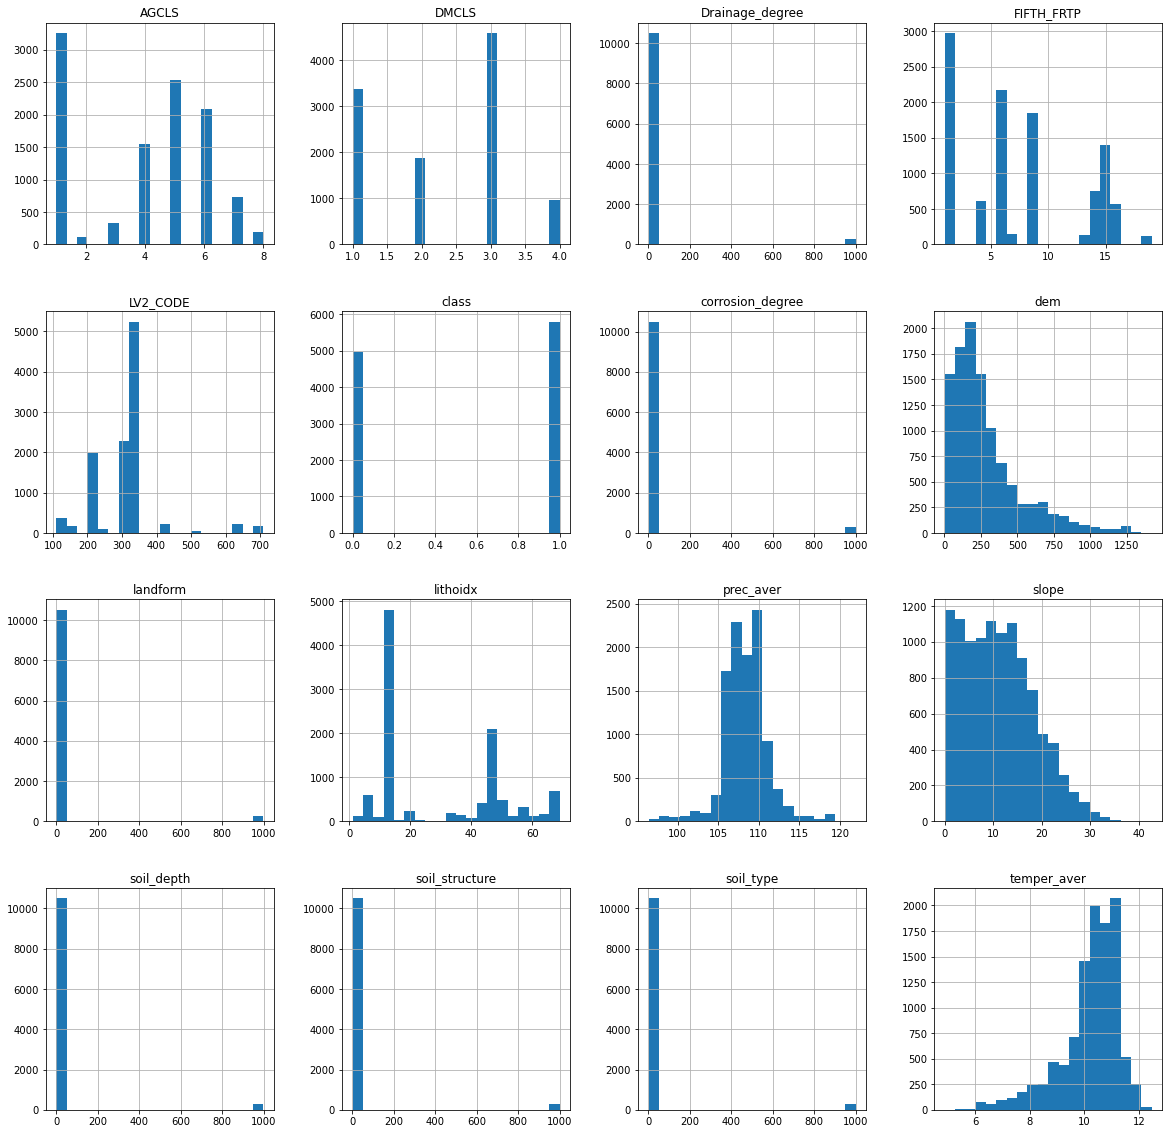

In [12]:
g_data_copy.hist(bins=20, figsize= (20, 20))

In [13]:
skew_col = ['dem', 'slope', 'temper_aver', 'prec_aver']
for c in skew_col:
    g_data_copy[c] = np.log1p(g_data_copy[c].values)
    
print(g_data_copy)

      class  AGCLS  corrosion_degree       dem  DMCLS  Drainage_degree  \
0         0    1.0               2.0  4.144411    1.0              2.0   
1         0    1.0               2.0  4.916308    1.0              2.0   
2         0    5.0               2.0  6.314585    3.0              1.0   
3         0    6.0               2.0  5.582932    3.0              1.0   
4         0    1.0               2.0  4.548168    1.0              2.0   
...     ...    ...               ...       ...    ...              ...   
5795      1    5.0               1.0  5.731508    3.0              2.0   
5796      1    6.0               1.0  5.570240    3.0              2.0   
5797      1    6.0               1.0  5.493847    3.0              2.0   
5798      1    6.0               1.0  5.666499    3.0              2.0   
5799      1    6.0               1.0  5.645916    3.0              2.0   

      FIFTH_FRTP  landform  lithoidx  LV2_CODE  prec_aver     slope  \
0            1.0       2.0      12.0    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001395357BE80>,
      dtype=object)

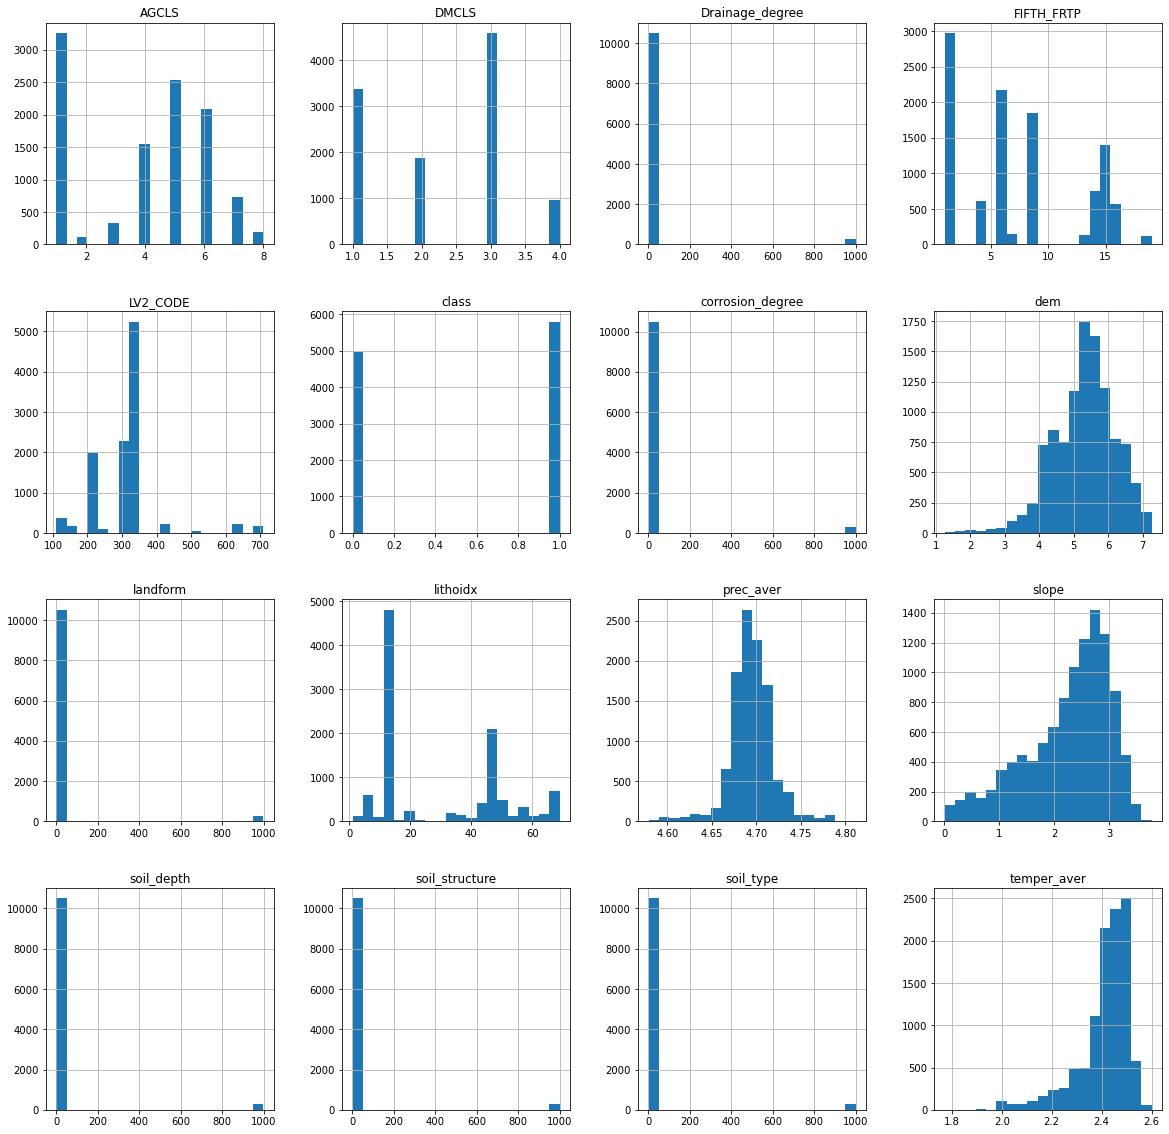

In [14]:
g_data_copy.hist(bins=20, figsize= (20, 20))

#### 범주형 변수에 대한 dummy 변수 생성
* 연속형 변수 이외의 모든 변수들은 범주형 변수로 one-hot-encoding을 통한 더미 변수를 생성한다.

In [15]:
g_data_copy['FIFTH_FRTP'] = g_data_copy['FIFTH_FRTP'].astype('str')
g_data_copy['AGCLS'] = g_data_copy['AGCLS'].astype('str')
g_data_copy['DMCLS'] = g_data_copy['DMCLS'].astype('str')
g_data_copy['lithoidx'] = g_data_copy['lithoidx'].astype('str')
g_data_copy['LV2_CODE'] = g_data_copy['LV2_CODE'].astype('str')
g_data_copy['soil_depth'] = g_data_copy['soil_depth'].astype('str')
g_data_copy['Drainage_degree'] = g_data_copy['Drainage_degree'].astype('str')
g_data_copy['corrosion_degree'] = g_data_copy['corrosion_degree'].astype('str')
g_data_copy['landform'] = g_data_copy['landform'].astype('str')
g_data_copy['soil_structure'] = g_data_copy['soil_structure'].astype('str')
g_data_copy['soil_type'] = g_data_copy['soil_type'].astype('str')

In [16]:
g_dummy_data = g_data_copy[['FIFTH_FRTP', 'AGCLS', 'DMCLS', 'lithoidx', 'LV2_CODE', 
                        'soil_depth', 'Drainage_degree', 'corrosion_degree', 'landform', 'soil_structure', 'soil_type']]
g_dummy_col=pd.get_dummies(g_dummy_data)

In [17]:
g_dummy_col

,FIFTH_FRTP_1.0,FIFTH_FRTP_10.0,FIFTH_FRTP_11.0,FIFTH_FRTP_12.0,FIFTH_FRTP_13.0,FIFTH_FRTP_14.0,FIFTH_FRTP_15.0,FIFTH_FRTP_16.0,FIFTH_FRTP_18.0,FIFTH_FRTP_19.0,...,soil_type_11.0,soil_type_13.0,soil_type_2.0,soil_type_3.0,soil_type_4.0,soil_type_5.0,soil_type_7.0,soil_type_8.0,soil_type_9.0,soil_type_999.0
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### 기존 데이터 프레임과 더미 변수화한 데이터 프레임 결합 및 기존 범주형 변수들의 삭제

In [18]:
g_data_dummy = pd.concat([g_data_copy, g_dummy_col], axis=1)
g_data_dummy

,class,AGCLS,corrosion_degree,dem,DMCLS,Drainage_degree,FIFTH_FRTP,landform,lithoidx,LV2_CODE,...,soil_type_11.0,soil_type_13.0,soil_type_2.0,soil_type_3.0,soil_type_4.0,soil_type_5.0,soil_type_7.0,soil_type_8.0,soil_type_9.0,soil_type_999.0
0,0,1.0,2.0,4.144411,1.0,2.0,1.0,2.0,12.0,220.0,...,0,0,0,0,0,0,0,1,0,0
1,0,1.0,2.0,4.916308,1.0,2.0,19.0,1.0,47.0,420.0,...,0,1,0,0,0,0,0,0,0,0
2,0,5.0,2.0,6.314585,3.0,1.0,15.0,1.0,7.0,320.0,...,0,1,0,0,0,0,0,0,0,0
3,0,6.0,2.0,5.582932,3.0,1.0,9.0,1.0,12.0,310.0,...,0,1,0,0,0,0,0,0,0,0
4,0,1.0,2.0,4.548168,1.0,2.0,1.0,2.0,47.0,220.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,1,5.0,1.0,5.731508,3.0,2.0,16.0,4.0,12.0,330.0,...,0,0,0,0,0,0,1,0,0,0
5796,1,6.0,1.0,5.570240,3.0,2.0,4.0,3.0,12.0,330.0,...,0,0,0,0,0,0,1,0,0,0
5797,1,6.0,1.0,5.493847,3.0,2.0,9.0,4.0,12.0,330.0,...,0,0,0,0,0,0,1,0,0,0
5798,1,6.0,1.0,5.666499,3.0,2.0,9.0,3.0,12.0,330.0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
g_data_dummy = g_data_dummy.drop(['FIFTH_FRTP', 'AGCLS', 'DMCLS', 'lithoidx', 'LV2_CODE', 
                        'soil_depth', 'Drainage_degree', 'corrosion_degree', 'landform', 'soil_structure', 'soil_type'], axis=1)

In [20]:
g_data_dummy

,class,dem,prec_aver,slope,temper_aver,FIFTH_FRTP_1.0,FIFTH_FRTP_10.0,FIFTH_FRTP_11.0,FIFTH_FRTP_12.0,FIFTH_FRTP_13.0,...,soil_type_11.0,soil_type_13.0,soil_type_2.0,soil_type_3.0,soil_type_4.0,soil_type_5.0,soil_type_7.0,soil_type_8.0,soil_type_9.0,soil_type_999.0
0,0,4.144411,4.676715,1.623146,2.515678,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,4.916308,4.706523,1.417054,2.519711,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,6.314585,4.688285,2.581778,2.403184,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,5.582932,4.692112,2.685412,2.431418,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,4.548168,4.698964,1.691200,2.496643,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,1,5.731508,4.695925,2.430240,2.420368,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5796,1,5.570240,4.680587,2.574860,2.450287,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5797,1,5.493847,4.680587,2.371622,2.450287,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5798,1,5.666499,4.695925,2.603830,2.420368,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


---

#### (2) 모델 학습 및 검증
#### 훈련 데이터와 테스트 데이터로 나눈 후 LogisticRegression 모델 학습

In [21]:
X = g_data_dummy.drop('class', axis=1)
y = g_data_dummy['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [22]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Ko\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### 테스트 데이터에 대한 예측 및 정확도 산출

In [23]:
g_pred = logreg.predict(X_test)
g_pred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test, g_pred)))

예측 정확도: 0.8015


#### 오차 행렬(confusion matrix)

In [25]:
from sklearn import metrics
g_cnf_matrix = metrics.confusion_matrix(y_test, g_pred)
g_cnf_matrix

array([[ 848,  382],
       [ 153, 1312]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

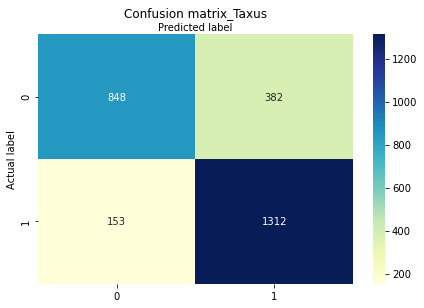

In [26]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(g_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix_Ginkgo', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### 정확도(Accuracy), 정밀도(Precision), 재현율(Recall)

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, g_pred))
print("Precision:",metrics.precision_score(y_test, g_pred))
print("Recall:",metrics.recall_score(y_test, g_pred))

Accuracy: 0.8014842300556586
Precision: 0.7744982290436836
Recall: 0.8955631399317406


#### ROC-AUC Score

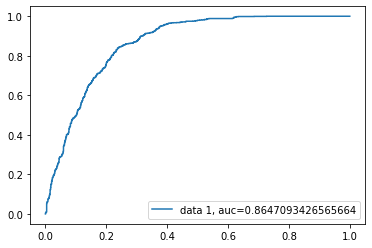

In [28]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

---

#### (3) 분석지역 예측 
#### 분석지역 데이터 불러오기 및 데이터프레임화
* 불러올 데이터들은 15개의 환경변수 데이터들로 모두 래스터 형식의 tif파일이다. 래스터 형식의 경우 하나의 픽셀(90x90)마다 각각 해당 지역 데이터 정보를 담고 있다. 따라서 불러온 데이터들을 reshape 작업을 통해 모델링 작업에서 사용한 데이터 프레임과 동일한 형태로 바꿔준다.

In [30]:
dem_1 = pd.DataFrame(io.imread('dem_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)
slope_1 = pd.DataFrame(io.imread('slope_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)
FIFTH_1 = pd.DataFrame(io.imread('FIFTH_FRTP_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)
AGCLS_1 = pd.DataFrame(io.imread('AGCLS_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)
DMCLS_1 = pd.DataFrame(io.imread('DMCLS_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)
lithoidx_1 = pd.DataFrame(io.imread('lithoidx_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)
LV2_CODE_1 = pd.DataFrame(io.imread('LV2_CODE_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)
soil_depth_1 = pd.DataFrame(io.imread('soil_depth_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)
Drainage_degree_1 = pd.DataFrame(io.imread('Drainage_degree_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)
corrosion_degree_1 = pd.DataFrame(io.imread('corrosion_degree_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)
landform_1 = pd.DataFrame(io.imread('landform_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)
soil_structure_1 = pd.DataFrame(io.imread('soil_structure_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)
soil_type_1 = pd.DataFrame(io.imread('soil_type_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)
temper_aver_1 = pd.DataFrame(io.imread('temper_aver_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)
prec_aver_1 = pd.DataFrame(io.imread('prec_aver_t.tif')).drop(index=[0, 1219], columns=[0, 1922]).values.reshape(-1,)

In [31]:
dic1 = {'dem': dem_1, 
        'slope': slope_1, 
        'FIFTH_FRTP': FIFTH_1, 
        'AGCLS': AGCLS_1, 
        'DMCLS': DMCLS_1, 
        'lithoidx': lithoidx_1, 
        'LV2_CODE': LV2_CODE_1, 
        'soil_depth': soil_depth_1, 
        'Drainage_degree': Drainage_degree_1, 
        'corrosion_degree': corrosion_degree_1, 
        'landform': landform_1, 
        'soil_structure': soil_structure_1, 
        'soil_type': soil_type_1, 
        'temper_aver': temper_aver_1, 
        'prec_aver': prec_aver_1}

In [32]:
plant_df = pd.DataFrame(dic1)
plant_df.head(10)

,dem,slope,FIFTH_FRTP,AGCLS,DMCLS,lithoidx,LV2_CODE,soil_depth,Drainage_degree,corrosion_degree,landform,soil_structure,soil_type,temper_aver,prec_aver
0,366.907867,5.552487,6.0,6.0,3.0,47.0,0.0,3.0,2.0,2.0,1.0,4.0,13.0,9.775000,109.333336
1,357.333649,12.183459,14.0,4.0,2.0,47.0,0.0,3.0,2.0,2.0,1.0,4.0,13.0,9.775000,109.333336
2,332.507141,16.212358,14.0,4.0,2.0,47.0,0.0,3.0,2.0,2.0,1.0,4.0,13.0,9.775000,109.333336
3,332.507141,16.212358,14.0,4.0,2.0,47.0,0.0,3.0,2.0,2.0,1.0,4.0,13.0,9.775000,109.333336
4,285.804565,10.131753,14.0,4.0,2.0,47.0,0.0,3.0,2.0,2.0,1.0,4.0,13.0,9.775000,109.333336
5,271.076019,9.466756,15.0,3.0,2.0,47.0,0.0,2.0,2.0,1.0,3.0,1.0,9.0,9.775000,109.333336
6,258.036346,9.663770,15.0,3.0,2.0,47.0,0.0,2.0,2.0,1.0,3.0,1.0,9.0,9.775000,109.333336
7,244.728958,8.387999,15.0,3.0,2.0,47.0,0.0,3.0,2.0,2.0,1.0,4.0,13.0,9.775000,109.333336
8,234.280334,3.636358,1.0,1.0,1.0,47.0,0.0,3.0,2.0,2.0,1.0,4.0,13.0,9.700001,109.583336
9,233.923965,6.209974,14.0,4.0,2.0,47.0,0.0,2.0,1.0,2.0,1.0,4.0,13.0,9.700001,109.583336


In [33]:
region_data_copy = plant_df.copy()

region_skew_col = ['dem', 'slope', 'temper_aver', 'prec_aver']
for c in region_skew_col:
    region_data_copy[c] = np.log1p(region_data_copy[c].values)
    
region_data_copy

,dem,slope,FIFTH_FRTP,AGCLS,DMCLS,lithoidx,LV2_CODE,soil_depth,Drainage_degree,corrosion_degree,landform,soil_structure,soil_type,temper_aver,prec_aver
0,5.907833,1.879845,6.0,6.0,3.0,47.0,0.0,3.0,2.0,2.0,1.0,4.0,13.0,2.377229,4.703506
1,5.881465,2.578963,14.0,4.0,2.0,47.0,0.0,3.0,2.0,2.0,1.0,4.0,13.0,2.377229,4.703506
2,5.809664,2.845628,14.0,4.0,2.0,47.0,0.0,3.0,2.0,2.0,1.0,4.0,13.0,2.377229,4.703506
3,5.809664,2.845628,14.0,4.0,2.0,47.0,0.0,3.0,2.0,2.0,1.0,4.0,13.0,2.377229,4.703506
4,5.658801,2.409802,14.0,4.0,2.0,47.0,0.0,3.0,2.0,2.0,1.0,4.0,13.0,2.377229,4.703506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339773,5.570938,3.236597,9.0,6.0,3.0,29.0,330.0,2.0,1.0,2.0,1.0,4.0,13.0,2.441622,4.598481
2339774,5.614907,3.102898,9.0,6.0,3.0,29.0,330.0,2.0,1.0,2.0,1.0,4.0,13.0,2.441622,4.598481
2339775,5.614907,3.102898,9.0,6.0,3.0,29.0,330.0,2.0,1.0,2.0,1.0,4.0,13.0,2.424065,4.610987
2339776,5.732431,3.264980,9.0,6.0,3.0,29.0,330.0,3.0,1.0,2.0,1.0,7.0,13.0,2.424065,4.610987


In [34]:
region_data_copy['FIFTH_FRTP'] = region_data_copy['FIFTH_FRTP'].astype('str')
region_data_copy['AGCLS'] = region_data_copy['AGCLS'].astype('str')
region_data_copy['DMCLS'] = region_data_copy['DMCLS'].astype('str')
region_data_copy['lithoidx'] = region_data_copy['lithoidx'].astype('str')
region_data_copy['LV2_CODE'] = region_data_copy['LV2_CODE'].astype('str')
region_data_copy['soil_depth'] = region_data_copy['soil_depth'].astype('str')
region_data_copy['Drainage_degree'] = region_data_copy['Drainage_degree'].astype('str')
region_data_copy['corrosion_degree'] = region_data_copy['corrosion_degree'].astype('str')
region_data_copy['landform'] = region_data_copy['landform'].astype('str')
region_data_copy['soil_structure'] = region_data_copy['soil_structure'].astype('str')
region_data_copy['soil_type'] = region_data_copy['soil_type'].astype('str')

In [35]:
region_dummy_data = region_data_copy[['FIFTH_FRTP', 'AGCLS', 'DMCLS', 'lithoidx', 'LV2_CODE', 
                        'soil_depth', 'Drainage_degree', 'corrosion_degree', 'landform', 'soil_structure', 'soil_type']]
region_dummy_col=pd.get_dummies(region_dummy_data)

In [36]:
region_dummy_col.head()

,FIFTH_FRTP_0.0,FIFTH_FRTP_1.0,FIFTH_FRTP_10.0,FIFTH_FRTP_11.0,FIFTH_FRTP_12.0,FIFTH_FRTP_13.0,FIFTH_FRTP_14.0,FIFTH_FRTP_15.0,FIFTH_FRTP_16.0,FIFTH_FRTP_17.0,...,soil_type_11.0,soil_type_13.0,soil_type_2.0,soil_type_3.0,soil_type_4.0,soil_type_5.0,soil_type_7.0,soil_type_8.0,soil_type_9.0,soil_type_999.0
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


#### g_dummy_col과 region_dummy_col의 columns 값들 비교 및 기존 모델링 재학습
* 기존 모델링에서 사용한 g_dummy_col의 경우 포인트들의 위치 값에 따라 변수들을 맵핑하였기 때문에 전체 분석대상 지역의 region_dummy_col과 비교했을 때 없는 feature들이 있게 된다. 따라서 기존 g_dummy_col에 없는 feature들을 0값으로 맵핑하여 추가하여 준 후 재학습을 시켜준다 

In [37]:
#g_dummy_col과 region_dummy_col의 columns 비교
print(g_dummy_col.columns)
print('-'*50)
print(region_dummy_col.columns)

Index(['FIFTH_FRTP_1.0', 'FIFTH_FRTP_10.0', 'FIFTH_FRTP_11.0',
       'FIFTH_FRTP_12.0', 'FIFTH_FRTP_13.0', 'FIFTH_FRTP_14.0',
       'FIFTH_FRTP_15.0', 'FIFTH_FRTP_16.0', 'FIFTH_FRTP_18.0',
       'FIFTH_FRTP_19.0',
       ...
       'soil_type_11.0', 'soil_type_13.0', 'soil_type_2.0', 'soil_type_3.0',
       'soil_type_4.0', 'soil_type_5.0', 'soil_type_7.0', 'soil_type_8.0',
       'soil_type_9.0', 'soil_type_999.0'],
      dtype='object', length=163)
--------------------------------------------------
Index(['FIFTH_FRTP_0.0', 'FIFTH_FRTP_1.0', 'FIFTH_FRTP_10.0',
       'FIFTH_FRTP_11.0', 'FIFTH_FRTP_12.0', 'FIFTH_FRTP_13.0',
       'FIFTH_FRTP_14.0', 'FIFTH_FRTP_15.0', 'FIFTH_FRTP_16.0',
       'FIFTH_FRTP_17.0',
       ...
       'soil_type_11.0', 'soil_type_13.0', 'soil_type_2.0', 'soil_type_3.0',
       'soil_type_4.0', 'soil_type_5.0', 'soil_type_7.0', 'soil_type_8.0',
       'soil_type_9.0', 'soil_type_999.0'],
      dtype='object', length=189)


In [38]:
#g_dummy_col과 region_dummy_col columns의 교집합
g_gyo_dummy_col = set(g_dummy_col.columns) & set(region_dummy_col.columns)
g_gyo_dummy_col

{'AGCLS_1.0',
 'AGCLS_2.0',
 'AGCLS_3.0',
 'AGCLS_4.0',
 'AGCLS_5.0',
 'AGCLS_6.0',
 'AGCLS_7.0',
 'AGCLS_8.0',
 'DMCLS_1.0',
 'DMCLS_2.0',
 'DMCLS_3.0',
 'DMCLS_4.0',
 'Drainage_degree_1.0',
 'Drainage_degree_2.0',
 'Drainage_degree_3.0',
 'Drainage_degree_4.0',
 'Drainage_degree_5.0',
 'Drainage_degree_6.0',
 'Drainage_degree_999.0',
 'FIFTH_FRTP_1.0',
 'FIFTH_FRTP_10.0',
 'FIFTH_FRTP_11.0',
 'FIFTH_FRTP_12.0',
 'FIFTH_FRTP_13.0',
 'FIFTH_FRTP_14.0',
 'FIFTH_FRTP_15.0',
 'FIFTH_FRTP_16.0',
 'FIFTH_FRTP_18.0',
 'FIFTH_FRTP_19.0',
 'FIFTH_FRTP_3.0',
 'FIFTH_FRTP_4.0',
 'FIFTH_FRTP_6.0',
 'FIFTH_FRTP_7.0',
 'FIFTH_FRTP_8.0',
 'FIFTH_FRTP_9.0',
 'LV2_CODE_110.0',
 'LV2_CODE_120.0',
 'LV2_CODE_130.0',
 'LV2_CODE_140.0',
 'LV2_CODE_150.0',
 'LV2_CODE_160.0',
 'LV2_CODE_210.0',
 'LV2_CODE_220.0',
 'LV2_CODE_230.0',
 'LV2_CODE_240.0',
 'LV2_CODE_250.0',
 'LV2_CODE_310.0',
 'LV2_CODE_320.0',
 'LV2_CODE_330.0',
 'LV2_CODE_410.0',
 'LV2_CODE_420.0',
 'LV2_CODE_430.0',
 'LV2_CODE_510.0',
 'LV2_C

In [39]:
#region_dummy_col에서 교집합 요소를 빼서 g_dummy_col에 없는 컬럼을 확인
g_uniq_col = set(region_dummy_col) - g_gyo_dummy_col
g_uniq_col

{'AGCLS_0.0',
 'AGCLS_10.0',
 'AGCLS_9.0',
 'DMCLS_0.0',
 'Drainage_degree_0.0',
 'FIFTH_FRTP_0.0',
 'FIFTH_FRTP_17.0',
 'FIFTH_FRTP_2.0',
 'FIFTH_FRTP_20.0',
 'FIFTH_FRTP_5.0',
 'LV2_CODE_0.0',
 'LV2_CODE_520.0',
 'LV2_CODE_720.0',
 'corrosion_degree_0.0',
 'landform_0.0',
 'lithoidx_0.0',
 'lithoidx_13.0',
 'lithoidx_16.0',
 'lithoidx_22.0',
 'lithoidx_31.0',
 'lithoidx_55.0',
 'lithoidx_57.0',
 'lithoidx_61.0',
 'soil_depth_0.0',
 'soil_structure_0.0',
 'soil_type_0.0'}

In [40]:
#g_uniq_col의 리스트화
g_list_uniq_col = list(g_uniq_col)

In [41]:
#list_uniq_col의 dummy_col에 추가
for g_unique in g_list_uniq_col:
    g_dummy_col[g_unique] = 0
    
g_dummy_col

,FIFTH_FRTP_1.0,FIFTH_FRTP_10.0,FIFTH_FRTP_11.0,FIFTH_FRTP_12.0,FIFTH_FRTP_13.0,FIFTH_FRTP_14.0,FIFTH_FRTP_15.0,FIFTH_FRTP_16.0,FIFTH_FRTP_18.0,FIFTH_FRTP_19.0,...,FIFTH_FRTP_17.0,FIFTH_FRTP_2.0,LV2_CODE_520.0,AGCLS_9.0,soil_type_0.0,LV2_CODE_720.0,soil_structure_0.0,DMCLS_0.0,lithoidx_61.0,lithoidx_13.0
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#달라진 dummy_col을 적용한 재학습
g_data_dummy = pd.concat([g_data_copy, g_dummy_col], axis=1)
g_data_dummy

,class,AGCLS,corrosion_degree,dem,DMCLS,Drainage_degree,FIFTH_FRTP,landform,lithoidx,LV2_CODE,...,FIFTH_FRTP_17.0,FIFTH_FRTP_2.0,LV2_CODE_520.0,AGCLS_9.0,soil_type_0.0,LV2_CODE_720.0,soil_structure_0.0,DMCLS_0.0,lithoidx_61.0,lithoidx_13.0
0,0,1.0,2.0,4.144411,1.0,2.0,1.0,2.0,12.0,220.0,...,0,0,0,0,0,0,0,0,0,0
1,0,1.0,2.0,4.916308,1.0,2.0,19.0,1.0,47.0,420.0,...,0,0,0,0,0,0,0,0,0,0
2,0,5.0,2.0,6.314585,3.0,1.0,15.0,1.0,7.0,320.0,...,0,0,0,0,0,0,0,0,0,0
3,0,6.0,2.0,5.582932,3.0,1.0,9.0,1.0,12.0,310.0,...,0,0,0,0,0,0,0,0,0,0
4,0,1.0,2.0,4.548168,1.0,2.0,1.0,2.0,47.0,220.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,1,5.0,1.0,5.731508,3.0,2.0,16.0,4.0,12.0,330.0,...,0,0,0,0,0,0,0,0,0,0
5796,1,6.0,1.0,5.570240,3.0,2.0,4.0,3.0,12.0,330.0,...,0,0,0,0,0,0,0,0,0,0
5797,1,6.0,1.0,5.493847,3.0,2.0,9.0,4.0,12.0,330.0,...,0,0,0,0,0,0,0,0,0,0
5798,1,6.0,1.0,5.666499,3.0,2.0,9.0,3.0,12.0,330.0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
g_data_dummy = g_data_dummy.drop(['FIFTH_FRTP', 'AGCLS', 'DMCLS', 'lithoidx', 'LV2_CODE', 
                        'soil_depth', 'Drainage_degree', 'corrosion_degree', 'landform', 'soil_structure', 'soil_type'], axis=1)
g_data_dummy

,class,dem,prec_aver,slope,temper_aver,FIFTH_FRTP_1.0,FIFTH_FRTP_10.0,FIFTH_FRTP_11.0,FIFTH_FRTP_12.0,FIFTH_FRTP_13.0,...,FIFTH_FRTP_17.0,FIFTH_FRTP_2.0,LV2_CODE_520.0,AGCLS_9.0,soil_type_0.0,LV2_CODE_720.0,soil_structure_0.0,DMCLS_0.0,lithoidx_61.0,lithoidx_13.0
0,0,4.144411,4.676715,1.623146,2.515678,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,4.916308,4.706523,1.417054,2.519711,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,6.314585,4.688285,2.581778,2.403184,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,5.582932,4.692112,2.685412,2.431418,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,4.548168,4.698964,1.691200,2.496643,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,1,5.731508,4.695925,2.430240,2.420368,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5796,1,5.570240,4.680587,2.574860,2.450287,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5797,1,5.493847,4.680587,2.371622,2.450287,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5798,1,5.666499,4.695925,2.603830,2.420368,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
#재학습
X = g_data_dummy.drop('class', axis=1)
y = g_data_dummy['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [45]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Ko\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### 분석대상 지역 예측 및 결과값 저장

In [46]:
region_data_dummy = pd.concat([region_data_copy, region_dummy_col], axis=1)
region_data_dummy

,dem,slope,FIFTH_FRTP,AGCLS,DMCLS,lithoidx,LV2_CODE,soil_depth,Drainage_degree,corrosion_degree,...,soil_type_11.0,soil_type_13.0,soil_type_2.0,soil_type_3.0,soil_type_4.0,soil_type_5.0,soil_type_7.0,soil_type_8.0,soil_type_9.0,soil_type_999.0
0,5.907833,1.879845,6.0,6.0,3.0,47.0,0.0,3.0,2.0,2.0,...,0,1,0,0,0,0,0,0,0,0
1,5.881465,2.578963,14.0,4.0,2.0,47.0,0.0,3.0,2.0,2.0,...,0,1,0,0,0,0,0,0,0,0
2,5.809664,2.845628,14.0,4.0,2.0,47.0,0.0,3.0,2.0,2.0,...,0,1,0,0,0,0,0,0,0,0
3,5.809664,2.845628,14.0,4.0,2.0,47.0,0.0,3.0,2.0,2.0,...,0,1,0,0,0,0,0,0,0,0
4,5.658801,2.409802,14.0,4.0,2.0,47.0,0.0,3.0,2.0,2.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339773,5.570938,3.236597,9.0,6.0,3.0,29.0,330.0,2.0,1.0,2.0,...,0,1,0,0,0,0,0,0,0,0
2339774,5.614907,3.102898,9.0,6.0,3.0,29.0,330.0,2.0,1.0,2.0,...,0,1,0,0,0,0,0,0,0,0
2339775,5.614907,3.102898,9.0,6.0,3.0,29.0,330.0,2.0,1.0,2.0,...,0,1,0,0,0,0,0,0,0,0
2339776,5.732431,3.264980,9.0,6.0,3.0,29.0,330.0,3.0,1.0,2.0,...,0,1,0,0,0,0,0,0,0,0


In [47]:
region_data_dummy = region_data_dummy.drop(['FIFTH_FRTP', 'AGCLS', 'DMCLS', 'lithoidx', 'LV2_CODE', 
                        'soil_depth', 'Drainage_degree', 'corrosion_degree', 'landform', 'soil_structure', 'soil_type'], axis=1)

In [48]:
region_data_dummy

,dem,slope,temper_aver,prec_aver,FIFTH_FRTP_0.0,FIFTH_FRTP_1.0,FIFTH_FRTP_10.0,FIFTH_FRTP_11.0,FIFTH_FRTP_12.0,FIFTH_FRTP_13.0,...,soil_type_11.0,soil_type_13.0,soil_type_2.0,soil_type_3.0,soil_type_4.0,soil_type_5.0,soil_type_7.0,soil_type_8.0,soil_type_9.0,soil_type_999.0
0,5.907833,1.879845,2.377229,4.703506,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,5.881465,2.578963,2.377229,4.703506,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,5.809664,2.845628,2.377229,4.703506,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,5.809664,2.845628,2.377229,4.703506,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5.658801,2.409802,2.377229,4.703506,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339773,5.570938,3.236597,2.441622,4.598481,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2339774,5.614907,3.102898,2.441622,4.598481,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2339775,5.614907,3.102898,2.424065,4.610987,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2339776,5.732431,3.264980,2.424065,4.610987,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [49]:
# 모델링 데이터 프레임(t_data_dummy)과 feature들의 순서 일치 작업
list_g = list(g_data_dummy.keys())
list_g.remove('class')
len(list_g)

193

In [50]:
region_data_dummy = region_data_dummy[list_g]
region_data_dummy

,dem,prec_aver,slope,temper_aver,FIFTH_FRTP_1.0,FIFTH_FRTP_10.0,FIFTH_FRTP_11.0,FIFTH_FRTP_12.0,FIFTH_FRTP_13.0,FIFTH_FRTP_14.0,...,FIFTH_FRTP_17.0,FIFTH_FRTP_2.0,LV2_CODE_520.0,AGCLS_9.0,soil_type_0.0,LV2_CODE_720.0,soil_structure_0.0,DMCLS_0.0,lithoidx_61.0,lithoidx_13.0
0,5.907833,4.703506,1.879845,2.377229,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.881465,4.703506,2.578963,2.377229,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,5.809664,4.703506,2.845628,2.377229,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,5.809664,4.703506,2.845628,2.377229,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5.658801,4.703506,2.409802,2.377229,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339773,5.570938,4.598481,3.236597,2.441622,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2339774,5.614907,4.598481,3.102898,2.441622,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2339775,5.614907,4.610987,3.102898,2.424065,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2339776,5.732431,4.610987,3.264980,2.424065,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#분석지역 서식 가능도 예측
g_pred_region_proba = logreg.predict_proba(region_data_dummy)
g_pred_region_proba

array([[0.65253999, 0.34746001],
       [0.5092546 , 0.4907454 ],
       [0.44915155, 0.55084845],
       ...,
       [0.7922993 , 0.2077007 ],
       [0.93632038, 0.06367962],
       [0.87982251, 0.12017749]])

In [52]:
#서식 가능도 결과물의 데이터프레임화
g_pred_region_proba_df = pd.DataFrame(g_pred_region_proba)
g_pred_region_proba_df

,0,1
0,0.652540,0.347460
1,0.509255,0.490745
2,0.449152,0.550848
3,0.449152,0.550848
4,0.484691,0.515309
...,...,...
2339773,0.774798,0.225202
2339774,0.796403,0.203597
2339775,0.792299,0.207701
2339776,0.936320,0.063680


In [53]:
#pred_region_proba rename and drop the No feature.
g_pred_region_proba_dfrename = g_pred_region_proba_df.rename(columns={0: 'No', 1: 'Yes'})
g_pred_region_proba_dfrename

,No,Yes
0,0.652540,0.347460
1,0.509255,0.490745
2,0.449152,0.550848
3,0.449152,0.550848
4,0.484691,0.515309
...,...,...
2339773,0.774798,0.225202
2339774,0.796403,0.203597
2339775,0.792299,0.207701
2339776,0.936320,0.063680


In [54]:
g_pred_region_proba_yes = g_pred_region_proba_dfrename.drop('No', axis=1)
g_pred_region_proba_yes

,Yes
0,0.347460
1,0.490745
2,0.550848
3,0.550848
4,0.515309
...,...
2339773,0.225202
2339774,0.203597
2339775,0.207701
2339776,0.063680


In [55]:
display_Ginkgo_proba = pd.DataFrame(g_pred_region_proba_yes.values.reshape(1218, 1921))
display_Ginkgo_proba

,0,1,2,3,4,5,6,7,8,9,...,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920
0,0.347460,0.490745,0.550848,0.550848,0.515309,0.142111,0.149350,0.138343,0.240913,0.406013,...,0.862814,0.555445,0.599442,0.889196,0.906004,0.966317,0.223324,0.875467,0.856244,0.115105
1,0.277590,0.309025,0.455852,0.543857,0.544401,0.162701,0.170207,0.164998,0.528268,0.155270,...,0.834851,0.751567,0.873318,0.800567,0.898912,0.787816,0.835918,0.231037,0.894565,0.914513
2,0.418144,0.293208,0.349141,0.349141,0.576792,0.583538,0.639264,0.600254,0.579698,0.154296,...,0.694052,0.820403,0.699545,0.888049,0.741852,0.888295,0.803906,0.398653,0.239031,0.382990
3,0.418144,0.293208,0.349141,0.349141,0.489173,0.583538,0.589154,0.600254,0.579698,0.154296,...,0.694434,0.869614,0.615447,0.890285,0.746173,0.728762,0.804190,0.803312,0.659306,0.384053
4,0.502980,0.479529,0.455308,0.455308,0.396991,0.568124,0.584225,0.605252,0.592897,0.454584,...,0.797887,0.712096,0.512862,0.776124,0.699966,0.820382,0.379229,0.069432,0.536280,0.240040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,0.699897,0.660532,0.738572,0.710070,0.375772,0.731199,0.661912,0.609390,0.605644,0.695070,...,0.109895,0.054730,0.038051,0.071431,0.088059,0.089055,0.039106,0.039258,0.024494,0.040996
1214,0.553167,0.660532,0.738572,0.738572,0.409822,0.758330,0.661912,0.642810,0.605644,0.663984,...,0.109895,0.054730,0.038051,0.071431,0.088059,0.089055,0.067120,0.067372,0.051686,0.084915
1215,0.496064,0.730643,0.702317,0.556020,0.395818,0.355280,0.693002,0.691597,0.720181,0.587863,...,0.003360,0.003591,0.238831,0.235467,0.229664,0.222654,0.242565,0.243306,0.158175,0.157983
1216,0.507975,0.594133,0.462182,0.673131,0.370308,0.633723,0.671564,0.734333,0.706183,0.598224,...,0.002751,0.209660,0.218914,0.226185,0.230810,0.225303,0.220285,0.068829,0.138277,0.135486


In [56]:
display_Ginkgo_proba100 = display_Ginkgo_proba * 100
display_Ginkgo_proba100

,0,1,2,3,4,5,6,7,8,9,...,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920
0,34.746001,49.074540,55.084845,55.084845,51.530937,14.211051,14.935018,13.834260,24.091304,40.601276,...,86.281415,55.544519,59.944201,88.919607,90.600428,96.631689,22.332352,87.546743,85.624379,11.510527
1,27.758999,30.902511,45.585167,54.385652,54.440077,16.270123,17.020657,16.499818,52.826824,15.526984,...,83.485109,75.156694,87.331769,80.056729,89.891214,78.781595,83.591810,23.103738,89.456543,91.451293
2,41.814432,29.320771,34.914131,34.914131,57.679194,58.353760,63.926421,60.025383,57.969810,15.429639,...,69.405161,82.040302,69.954520,88.804877,74.185180,88.829454,80.390563,39.865340,23.903055,38.299009
3,41.814432,29.320771,34.914131,34.914131,48.917299,58.353760,58.915431,60.025383,57.969810,15.429639,...,69.443439,86.961432,61.544696,89.028480,74.617322,72.876166,80.418975,80.331244,65.930634,38.405301
4,50.298012,47.952854,45.530771,45.530771,39.699102,56.812404,58.422456,60.525183,59.289716,45.458436,...,79.788675,71.209627,51.286240,77.612430,69.996551,82.038208,37.922861,6.943157,53.627971,24.003975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,69.989678,66.053173,73.857172,71.007046,37.577186,73.119924,66.191182,60.939035,60.564417,69.507043,...,10.989521,5.473024,3.805126,7.143108,8.805850,8.905457,3.910593,3.925757,2.449360,4.099624
1214,55.316694,66.053173,73.857172,73.857172,40.982188,75.833036,66.191182,64.281020,60.564417,66.398425,...,10.989521,5.473024,3.805126,7.143108,8.805850,8.905457,6.711961,6.737226,5.168635,8.491537
1215,49.606366,73.064250,70.231696,55.601980,39.581813,35.527993,69.300174,69.159732,72.018072,58.786302,...,0.336047,0.359144,23.883127,23.546677,22.966432,22.265445,24.256530,24.330612,15.817524,15.798335
1216,50.797546,59.413259,46.218172,67.313069,37.030795,63.372328,67.156392,73.433314,70.618346,59.822439,...,0.275103,20.965987,21.891363,22.618495,23.080953,22.530335,22.028530,6.882891,13.827723,13.548588


In [57]:
#결과물 저장
display_Ginkgo_proba100.to_csv("Ginkgo_display_proba100.asc", header=False, index=False)